In [180]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.20.3
Pandas: 1.3.4
Matplotib: 3.4.3
Seaborn: 0.11.2
Scipy: 1.7.1
Sklearn: 0.24.2


In [181]:
#import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
#load the dataset
data = pd.read_csv('creditcard.csv')

In [183]:
#explore data set
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [184]:
print(data.shape)

(284807, 31)


In [185]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [186]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

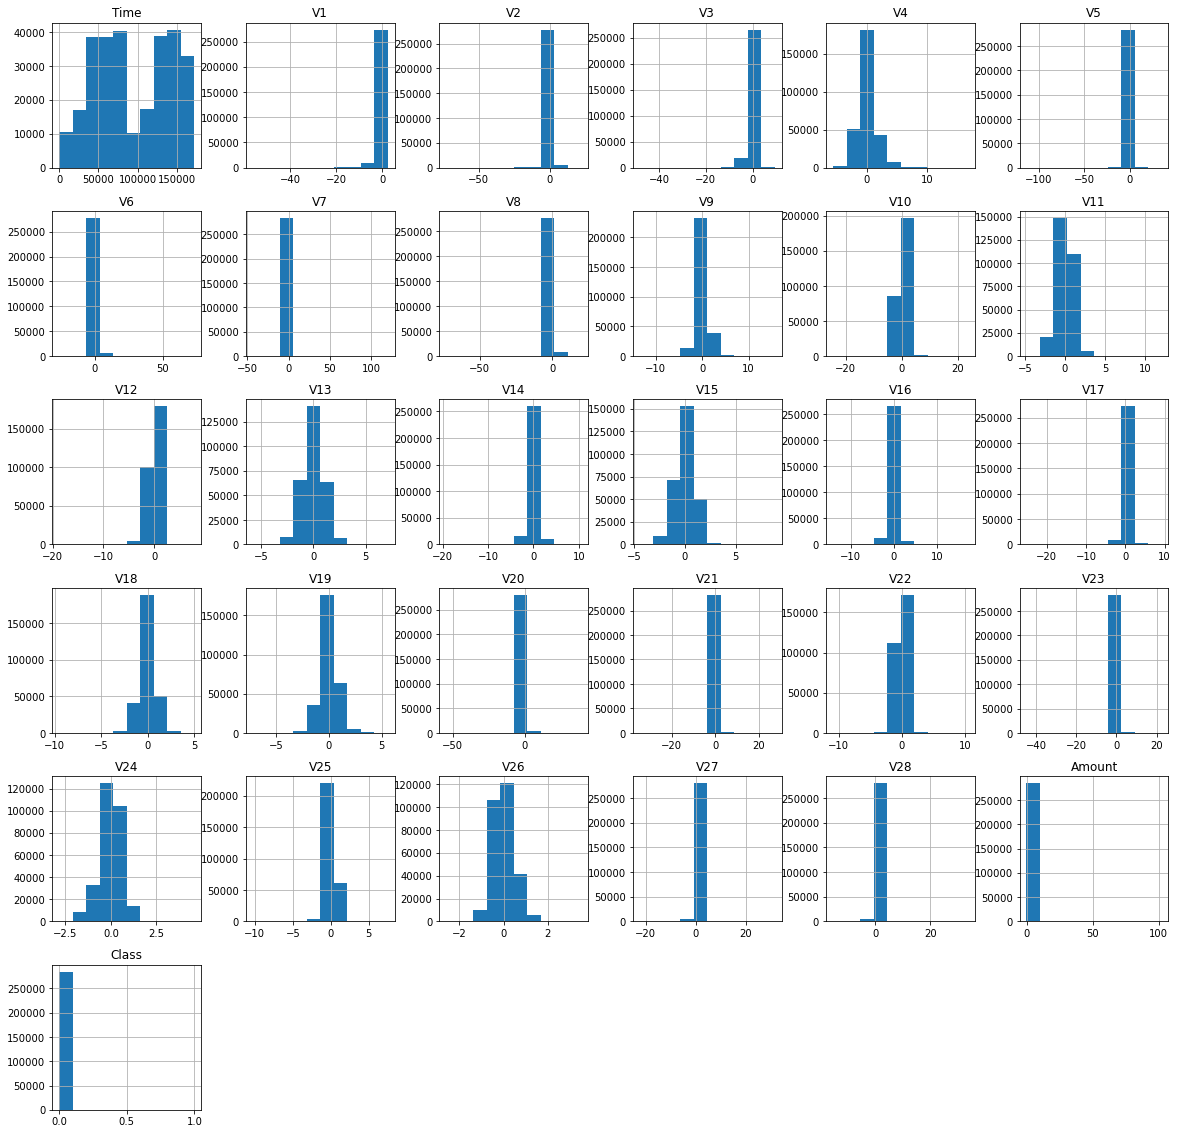

In [187]:
#Plot histogram of each parameter
data.hist(figsize = (20,20))
plt.show()

In [188]:
#Determine the fraud caes in the data set
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

fraud_percentage = len(Fraud)*100 / float(len(Valid))
print(fraud_percentage)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

0.17304750013189596
Fraud Cases: 492
Valid Cases: 284315


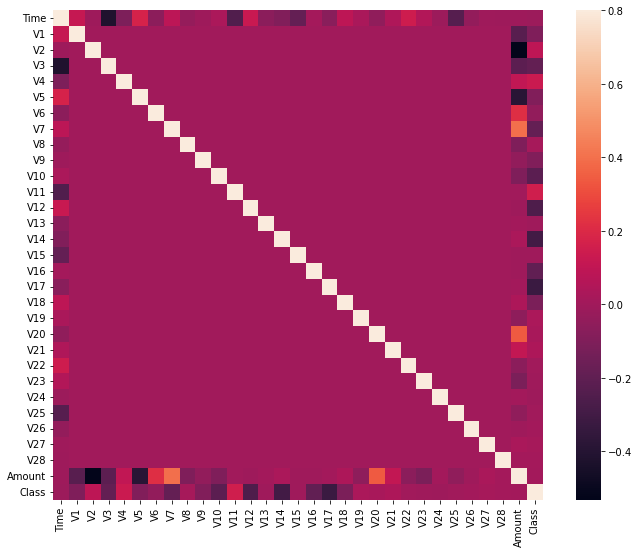

In [189]:
#Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat,vmax = .8,square = True)
plt.show()

In [190]:
#Get all the columns from the data frame
columns = data.columns.tolist()

#Filter the columns to remove data we don't want
columns = [c for c in columns if c not in ["Class"]]

#Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

#Print the shapes of X nad Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [191]:
X = data.drop('Class', axis = 1).values
y = data['Class'].values

# Decision Tree

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [193]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_yhat = DT.predict(X_test)

In [194]:
#check the accuracy of our decision tree model.

from sklearn import tree
from sklearn.metrics import accuracy_score
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_yhat)))

Accuracy score of the Decision Tree model is 0.9993960843796522


In [195]:
#Check F1-Score for the decision tree model.

from sklearn.metrics import f1_score
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_yhat)))

F1 score of the Decision Tree model is 0.7922705314009663


In [196]:
#Check the confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, dt_yhat, labels = [0, 1])

array([[71077,    14],
       [   29,    82]], dtype=int64)

# K-Nearest Neighbours

In [197]:
from sklearn.neighbors import KNeighborsClassifier

n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

In [198]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.9985253223224066


In [199]:
#Checking F1-Score for the K-Nearest Neighbors model

print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))

F1 score of the K-Nearest Neighbors model is 0.10256410256410257


#    Logistic Regresssion

In [200]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

C:\Users\hruth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [201]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9989326142524086


In [202]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

F1 score of the Logistic Regression model is 0.6545454545454545


# Support Vector Machine

In [203]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [204]:
# check the accuracy of our Support Vector Machines model
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_yhat)))

Accuracy score of the Support Vector Machines model is 0.9984410550265442


In [205]:
#Check F1-Score for the Support Vector Machines model
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_yhat)))

F1 score of the Support Vector Machines model is 0.0


# Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [207]:
# check the accuracy of our Random Forest model
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9993399061824106


In [208]:
# Check F1-Score for the Random Forest model
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))

F1 score of the Random Forest model is 0.7564766839378239


# XGBoost

In [209]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

C:\Users\hruth\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:20:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [210]:
# check the accuracy of our XGBoost model
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))

Accuracy score of the XGBoost model is 0.9995786635206876


In [211]:
# Check F1-Score for the XGBoost model
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))

F1 score of the XGBoost model is 0.8484848484848485


In [212]:
print('Accuracy',round(accuracy_score(y_test,dt_yhat)*100,4),'%,decision_tree')
print('Accuracy',round(accuracy_score(y_test,knn_yhat)*100,4),'%,k-nearest neighbors')
print('Accuracy',round(accuracy_score(y_test,lr_yhat)*100,4),'%,logistic regression')
print('Accuracy',round(accuracy_score(y_test,svm_yhat)*100,4),'%,support vector machine')
print('Accuracy',round(accuracy_score(y_test,rf_yhat)*100,4),'%,random_forest')
print('Accuracy',round(accuracy_score(y_test,xgb_yhat)*100,4),'%,xg-boost')

Accuracy 99.9396 %,decision_tree
Accuracy 99.8525 %,k-nearest neighbors
Accuracy 99.8933 %,logistic regression
Accuracy 99.8441 %,support vector machine
Accuracy 99.934 %,random_forest
Accuracy 99.9579 %,xg-boost


In [213]:
print('confusion matrix\n',confusion_matrix(y_test,dt_yhat),'decision_tree')
print('confusion matrix\n',confusion_matrix(y_test,knn_yhat),'k-nearest neighbors')
print('confusion matrix\n',confusion_matrix(y_test,lr_yhat),'logistic regression')
print('confusion matrix\n',confusion_matrix(y_test,svm_yhat),'support vector machine')
print('confusion matrix\n',confusion_matrix(y_test,rf_yhat),'random_forest')
print('confusion matrix\n',confusion_matrix(y_test,xgb_yhat),'xg-boost')

confusion matrix
 [[71077    14]
 [   29    82]] decision_tree
confusion matrix
 [[71091     0]
 [  105     6]] k-nearest neighbors
confusion matrix
 [[71054    37]
 [   39    72]] logistic regression
confusion matrix
 [[71091     0]
 [  111     0]] support vector machine
confusion matrix
 [[71082     9]
 [   38    73]] random_forest
confusion matrix
 [[71088     3]
 [   27    84]] xg-boost


We have received 99.9579% accuracy in our credit card fraud detection using the XGBoost method. This number should not be surprising as our data was balanced towards one class. The good thing that we have noticed from the confusion matrix is that — our model is not overfitted.

Finally, based on our accuracy score — XGBoost is the winner for our case.